In [1]:
# Example of linear regression with multiple features.
# Here our example training data is a 1x4 matrix which represents features of a house.
# Features are: size in msquares, number of bedrooms, age, quality of neighbourhood (more = better).
# The feature matrix is described by a price for such house in thousands.
# We will use 10 samples.

# This time we will scale our input features to be of a similar dimension.

import numpy as np

# Define training features.
                     # size, bedrooms, age, quality of neighbourhood
training_features = np.array([[50, 1, 1, 10], 
                              [75, 2, 1, 10], 
                              [50, 1, 8, 5], 
                              [55, 2, 1, 10], 
                              [100, 3, 1, 10],
                              [50, 1, 4, 5],
                              [200, 3, 1, 10],
                              [50, 1, 1, 3],
                              [100, 3, 1, 1],
                              [75, 2, 3, 10]])

# Define prices.
prices = np.array([400, 
                   600, 
                   200, 
                   477, 
                   800,
                   250,
                   1200,
                   300,
                   500,
                   550])

print(f"training features shape: {training_features.shape}")
print(f"training features type: {type(training_features)}")
print(f"prices shape: {prices.shape}")
print(f"prices type: {type(prices)}")

training features shape: (10, 4)
training features type: <class 'numpy.ndarray'>
prices shape: (10,)
prices type: <class 'numpy.ndarray'>


In [2]:
def z_score_normalization(X):
    # params:
    # X [ndarray : Shape (n, m)] - Training dataset with multiple features.
    # returns:
    # X_norm [ndarray : Shape (n, m)] - Z-score normalized dataset.
    
    # Find mu and sigma.
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    
    # Use mu and sigma to do a element-based calculations to normalize whole dataset.
    X_norm = (X - mu) / sigma
    
    return X_norm

In [3]:
# Prediction model f(x) = wx + b, where x and w are vectors (multiple features) and b is a scalar
def predict(x, w, b):
    # params:
    # x [ndarray : Shape (n,)] - Example with multiple features.
    # w [ndarray : Shape (n,)] - Model parameters (weights).
    # b [scalar] - Model parameter (bias).
    # returns:
    # [scalar] - Prediction.
    
    return np.dot(w, x) + b

w_test = np.array([0.75, 0.12, 0.1, 0.05])
b_test = 0.25
print(f"prediction for some w = {w_test}, some b = {b_test}: {predict(([50, 1, 1, 10]), w_test, b_test)}")

prediction for some w = [0.75 0.12 0.1  0.05], some b = 0.25: 38.47


In [4]:
# Cost function - mean squared error.
def cost(x, y, w, b):
    # params:
    # x [ndarray : Shape (n, m)] - Dataset with m-examples and n-features. 
    # y [ndarray : Shape (m,)] - Prices for corresponding example. 
    # w [ndarray : Shape (n,)] - Model weights. 
    # b [scalar] - Model bias.
    # returns:
    # [scalar] - Cost for given weights and bias.
    
    # Find number of examples.
    m = x.shape[0]
    
    cost = 0
    for i in range(m):
        cost += (predict(x[i], w, b) - y[i]) ** 2
        
    return cost / 2 * m

w_test = np.array([0.75, 0.12, 0.1, 0.05])
b_test = 0.25
print(f"cost for some w = {w_test}, some b = {b_test}: {cost(training_features, prices, w_test, b_test)}")

cost for some w = [0.75 0.12 0.1  0.05], some b = 0.25: 13998468.4035


In [5]:
# Compute gradient for given training set.
def compute_gradient(X, y, w, b):
    # params:
    # X [ndarray : Shape(n, m)] - Dataset with m-examples and n-features.
    # y [ndarray : Shape(m,)] - Prices for the given examples.
    # w [ndarray : Shape(n,)] - Weights for n features.
    # b [scalar] - Bias.
    # returns:
    # dj_dw [ndarray : Shape(n,)] - Gradient of weights.
    # dj_db [scalar] - Gradient of bias.
    
    # Get number of examples.
    m = X.shape[0]
    
    # Get number of features.
    n = X.shape[1]
    
    # Initialize the partial derivatives.
    dj_dw = np.zeros((n,))
    dj_db = 0
    
    # For each example.
    for i in range(m):
        
        # Find the error which is the same for both w and b.
        err = (np.dot(X[i], w) + b) - y[i]
        
        # Find the w's (there is n amount of w's, one for each feature).
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err * X[i, j]
            
        # Find the b's (there is only one b per feature set).
        dj_db = dj_db + err
        
    dj_dw /= m
    dj_db /= m
    
    return dj_dw, dj_db        

In [6]:
# Train with the gradient descent to find weights and bias required to predict house price.
def gradient_descent(X, y, w_init, b_init, cost_function, gradient_function, step, iterations):
    # params:
    # X [ndarray : Shape(n,m)] - Training matrix with m examples and n features.
    # y [ndarray : Shape(m,)] - Training outputs.
    # w_init [ndarray : Shape(n,)] - Initial weights for the examples.
    # b_init [scalar] - Initial bias for the examples.
    # cost_function [functor] - Function to compute cost.
    # gradient_function [functor] - Function to compute gradient for given iteration.
    # step [scalar] - Size of step for iterations.
    # iterations [scalar] - Number of the descent iterations.
    # returns:
    # w [ndarray : Shape(n, m)] - Found weights.
    # b [scalar] - Found bias.
    # cost_history [list : Size(iterations)] - Vector of cost history to graph it.
    
    # Cost history for the graph.
    cost_history = []
    
    # Descent.
    w = w_init
    b = b_init
    
    for i in range(iterations):
        
        # Find gradients.
        dj_dw, dj_db = gradient_function(X, y, w, b)
        
        # Update w and b.
        w = w - step * dj_dw
        b = b - step * dj_db
        
        cost = cost_function(X, y, w, b)
        cost_history.append(cost)
        
        if (i % 1 == 0 or i == 0):
            print(f"cost at iteration step {i}: {cost}")
        
    return w, b, cost_history

In [7]:
# We train our model and save weights and bias.

initial_weights = np.array([0.1, 0.1, 0.1, 0.1])
initial_bias = 1

step_size = 0.85
iteration = 100

w, b, cost_history = gradient_descent(z_score_normalization(training_features), prices, initial_weights, initial_bias, cost, compute_gradient, step_size, iteration)

print(f"found weights: {w}, found bias: {b}")

cost at iteration step 0: 3147307.9863733724
cost at iteration step 1: 2130583.7705871337
cost at iteration step 2: 1607224.4593697372
cost at iteration step 3: 1220975.5336846255
cost at iteration step 4: 930259.6238231356
cost at iteration step 5: 710948.8973406794
cost at iteration step 6: 545397.0755951074
cost at iteration step 7: 420385.32447577163
cost at iteration step 8: 325963.7922880829
cost at iteration step 9: 254632.80308146673
cost at iteration step 10: 200736.10657507103
cost at iteration step 11: 160006.09909546733
cost at iteration step 12: 129221.8835797736
cost at iteration step 13: 105951.87468298122
cost at iteration step 14: 88359.91860662427
cost at iteration step 15: 75059.18188219794
cost at iteration step 16: 65001.99237499822
cost at iteration step 17: 57396.75440760656
cost at iteration step 18: 51645.26248360104
cost at iteration step 19: 47295.39091859861
cost at iteration step 20: 44005.37807261161
cost at iteration step 21: 41516.85695551154
cost at ite

In [8]:
# Specify index from the training set to test result.
i = 0

training_features_normalized = z_score_normalization(training_features)

print(f"prediction for: {training_features[i]} is: {predict(training_features_normalized[i], w, b)}, expected: {prices[i]}")

prediction for: [50  1  1 10] is: 429.0119599343651, expected: 400


In [9]:
# Predict arbitrary house.
a = np.array([77, 1, 1, 10])

print(f"prediction for: {a} is: {predict(z_score_normalization(a), w, b)}")

prediction for: [77  1  1 10] is: 835.9207896996695


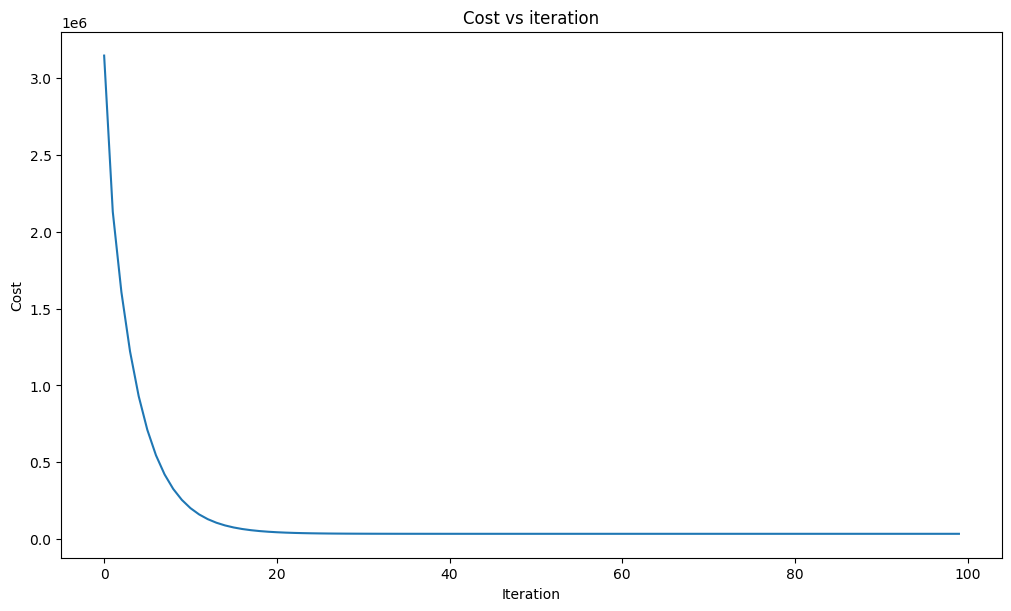

In [20]:
import matplotlib.pyplot as plt
fig, (plot1) = plt.subplots(1, 1, constrained_layout=True, figsize=(10, 6))

plot1.plot(cost_history)
plot1.set_title("Cost vs iteration")
plot1.set_xlabel("Iteration")
plot1.set_ylabel("Cost")

plt.show()

In [21]:
# As shown above, prediction is still a little off, which means training data might be inaccurate, 
# but what's very important - because of feature scaling, we converged after like 50 iterations, opposed to thousands in the previous example.